# Task 2 - Prediction using Unsupervised ML
## (Level - Beginner)


---


**Author :** Aditya K. Kataria <br>
**Email :** adityakataria36@gmail.com <br>
**Github :** https://github.com/AdityaK1211/Iris_OptimumClusters_Prediction_using_UnsupervisedML <br>
**Data Science & Business Analytics Internship** <br>
GRIP December2020


---


**Aim :** From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. <br>
**Dataset :** Data can be found at https://bit.ly/3kXTdox <br>


---



## Unsupervised Machine Learning
Unsupervised learning is the training of machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance. In simple terms, it learns from observations.
Unsupervised learning classified into two categories of algorithms: 
1. **Clustering :** A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.
2. **Association :** An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.

## K-Means Clustering
K-means clustering is one of the simplest unsupervised machine learning algorithms. It takes a bunch of unlabeled points and tries to group them into "k" number of clusters.

To find the number of clusters, we need to run the k-means clustering algorithm for a range of k values and compare the results.

### Working
**Step 1:** Determine K value by Elbow method and specify the number of clusters K.<br>
**Step 2:** Randomly assign each data point to a cluster.<br>
**Step 3:** Determine the cluster centroid coordinates.<br>
**Step 4:** Determine the distances of each data point to the centroids and re-assign each point to the closest cluster centroid based upon minimum distance.<br>
**Step 5:** Calculate cluster centroids again.<br>
**Step 6:** Repeat steps 4 and 5 until we reach global optima where no improvements are possible and no switching of data points from one cluster to other.

## Libraries
NumPy to perform the multi-dimensional operation.

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.

Seaborn and Matplotlib used for plotting and vizualization of data.

Scikit is used for pre-processing with LabelEncoder, K-means clustering, model evaluation and confusion matrix.

Scipy computes the distance between each pair of the two collections of inputs.

In [ ]:
# Importing all the important Libraries
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates, andrews_curves
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

## Loading Dataset
The dataset is available at https://bit.ly/3kXTdox.

The iris dataset consists of 150 records with 6 columns as 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' and 'Species' represnting the species of iris flower as per the sepal and petal attributes.

The datseaset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor)

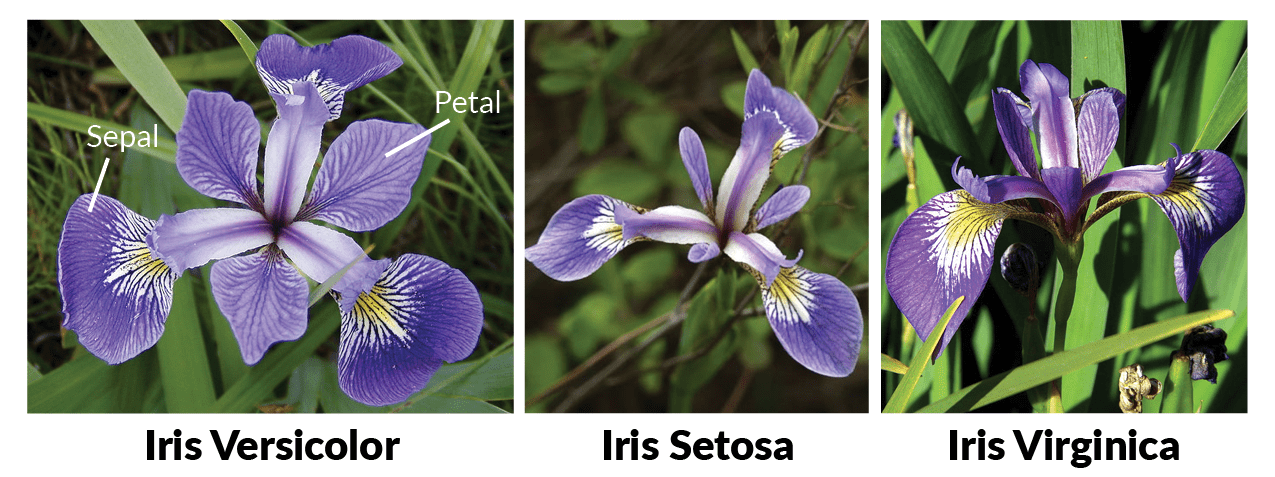

In [ ]:
# Loading Dataset
df = pd.read_csv('Iris.csv')
print('Shape:', df.shape)
df.head()

Shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Iris Species in Dataset
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Visualizing Data
**Pie chart :** Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

**Andrews Curves :** Andrews Curves involve using attributes of samples as coefficients for Fourier series. 

**Parallel Plotting :** Parallel coordinates plots each feature on a separate column and then draws lines connecting the features for each data sample.

**PairPlot :** Pair plot makes high-level scatter plots to capture relationships between multiple variables within a dataframe. It help us to understand the relationship between various independent features

**PairGrid :** Pair grid is a subplot grid for plotting pairwise relationships in a dataset. It allows us to draw a grid of subplots using the same plot type to visualize data.

**Heatmap :** Heat map is used to find out the correlation between different features in the dataset. High positive or negative value shows that the features have high correlation.

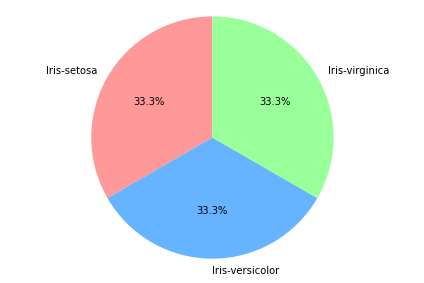

In [ ]:
# Pie chart
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sizes = [(df['Species'] == 'Iris-setosa').sum(),
         (df['Species'] == 'Iris-versicolor').sum(),
         (df['Species'] == 'Iris-virginica').sum()]
# colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.savefig('piechart.png')
plt.show()

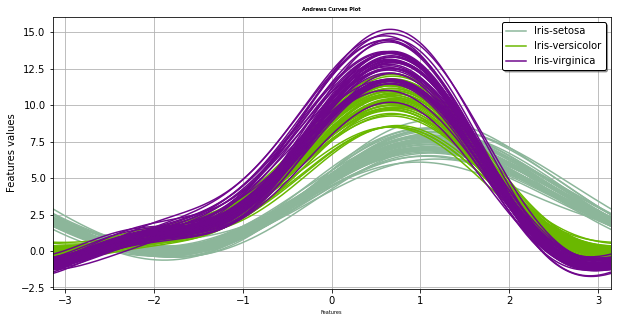

In [ ]:
# Andrews Curves
plt.figure(figsize=(10, 5))
andrews_curves(df.drop("Id", axis=1), "Species")
plt.title('Andrews Curves Plot', fontsize=5, fontweight='bold')
plt.xlabel('Features', fontsize=5)
plt.ylabel('Features values', fontsize=10)
plt.legend(loc=1, prop={'size': 10}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.savefig('andrewscurves.png')
plt.show()

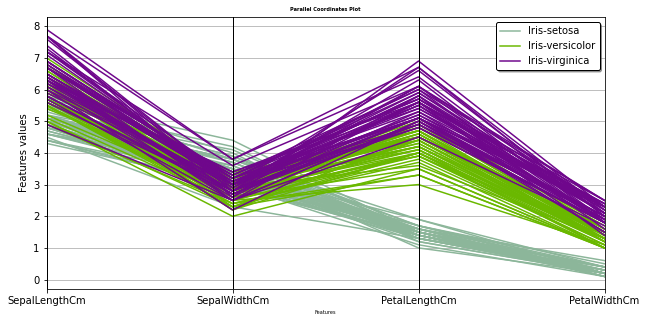

In [ ]:
# Parallel Coordinates
plt.figure(figsize=(10, 5))
parallel_coordinates(df.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=5, fontweight='bold')
plt.xlabel('Features', fontsize=5)
plt.ylabel('Features values', fontsize=10)
plt.legend(loc=1, prop={'size': 10}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.savefig('parallelcoordinates.png')
plt.show()

<Figure size 432x288 with 0 Axes>

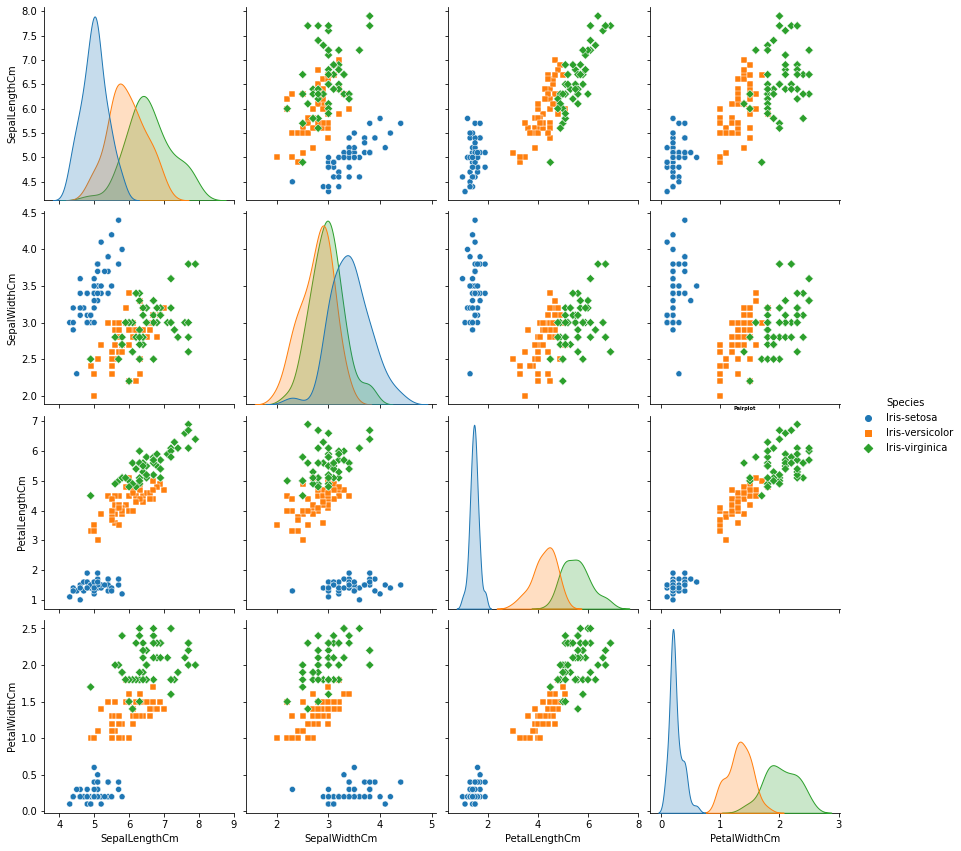

In [ ]:
# Pairplot
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue="Species", height=3, markers=["o", "s", "D"])
plt.title('Pairplot', fontsize=5, fontweight='bold')
plt.savefig('pairplot.png')
plt.show()

<Figure size 432x288 with 0 Axes>

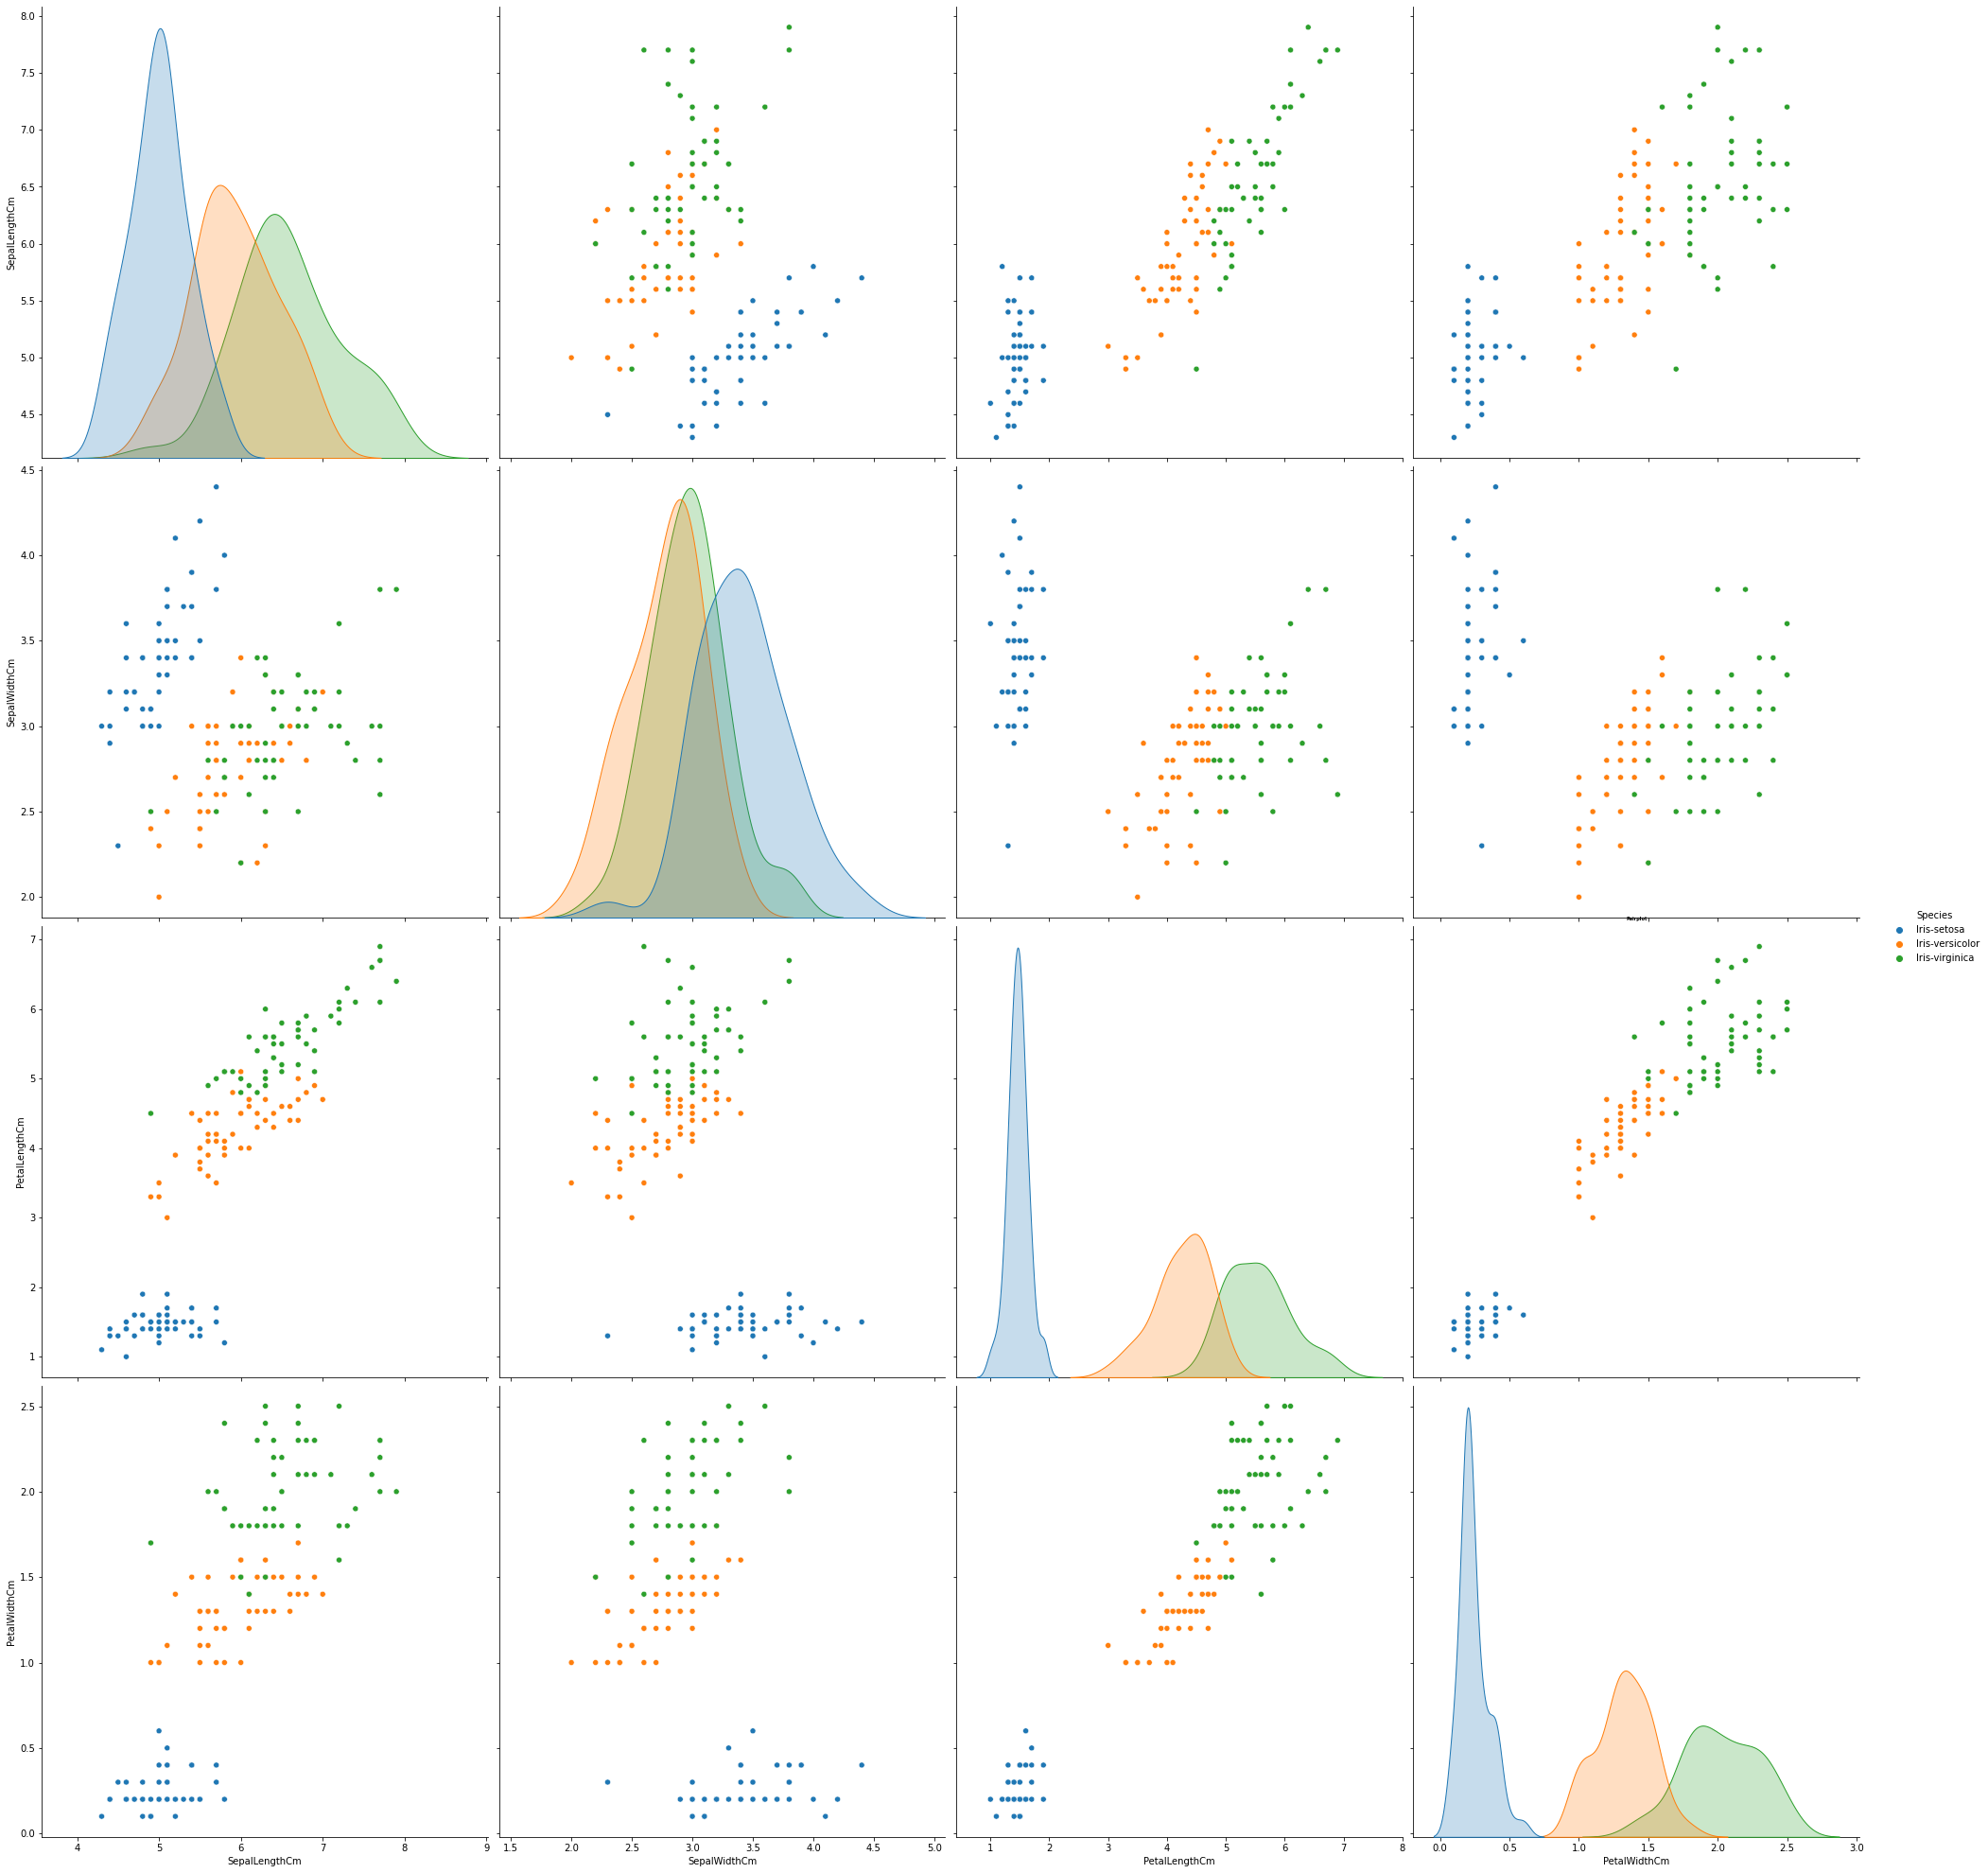

In [ ]:
# Pairgrid
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue="Species", height=7, diag_kind="kde")
plt.title('Pairplot', fontsize=5, fontweight='bold')
plt.savefig('pairgrid.png')
plt.show()

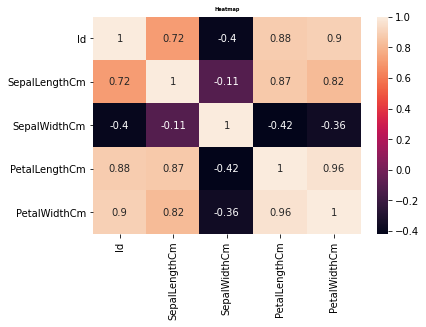

In [ ]:
# Heatmap
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap', fontsize=5, fontweight='bold')
plt.savefig('heatmap.png')
plt.show()

## Preparing the data
Here, we store the values of attributes 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm' and 'PetalWidthCm' in X and label 'Species' in y.

In [ ]:
# Dividing the dataset columns. 
# Attributes in X and Labels in y
X = df.iloc[:, [1, 2, 3, 4]].values
y = df['Species'].values

## Label Encoder
As we can see labels are categorical. K-means does not accept string labels. We
need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Irisversicolor correspond to 1 and Iris-virginica correspond to 2.


In [ ]:
# Label Encoder
encoder = LabelEncoder()
y_label = encoder.fit_transform(y)
y_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Elbow Method
One obvious question that may come to mind is the methodology for picking the K value. This is done using an elbow curve, where the x-axis is the K-value and the y axis is some objective function. A common objective function is the average distance between the datapoints and the nearest centroid.

The best number for K is the "elbow" or kinked region. After this point, it is generally established that adding more clusters will not add significant value to your analysis.

**distortion :** It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.

**inertia :** It is the sum of squared distances of samples to their closest cluster center.

We set n_init=10 to run the k-means clustering algorithms 10 times independently with different centroids to choose the final model.

k-means++ selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

max_iter parameter specifies the maximum number of iterations for each single run.

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
  
for i in range(1,10):
    #Building and fitting the model
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(X)
    kmeans.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                      'euclidean'),axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)

    mapping1[i] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                 'euclidean'),axis=1)) / X.shape[0]
    mapping2[i] = kmeans.inertia_

1 : 1.943034159037026
2 : 0.856027968244863
3 : 0.648839494895334
4 : 0.5585746563385618
5 : 0.5104611995137194
6 : 0.46638747942971565
7 : 0.43480292754684363
8 : 0.4114420911082941
9 : 0.3949582353369552


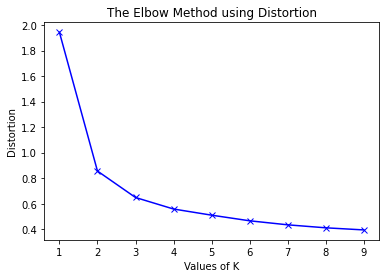

In [ ]:
# Distortions
for key,val in mapping1.items():
    print(str(key)+' : '+str(val))

plt.plot(range(1, 10), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.savefig('distortions.png')
plt.show()

1 : 680.8244
2 : 152.36870647733906
3 : 78.94084142614602
4 : 57.345409315718165
5 : 46.53558205128205
6 : 38.93873974358974
7 : 34.19068792479662
8 : 29.905374299825105
9 : 27.927882157034972


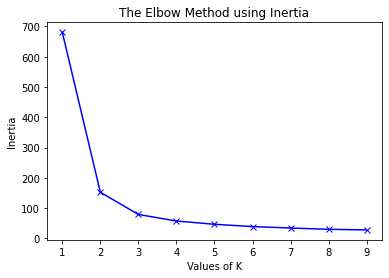

In [ ]:
# Inertia
for key,val in mapping2.items():
    print(str(key)+' : '+str(val))

plt.plot(range(1, 10), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.savefig('inertia.png')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

To determine the optimal number of clusters, we have to select the value of k at the "elbow" ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

## K-Means Clustering
The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean u<sub>i</sub> of the samples in the cluster. The means are commonly called the cluster "centroids"; note that they are not, in general, points from X<sub>i</sub>, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares. Inertia can be recognized as a measure of how internally coherent clusters are.

In [ ]:
# K-Means Clustering
# Predicting labels
kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
# Calculating cluster centers
centers = kmeans.cluster_centers_
centers

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

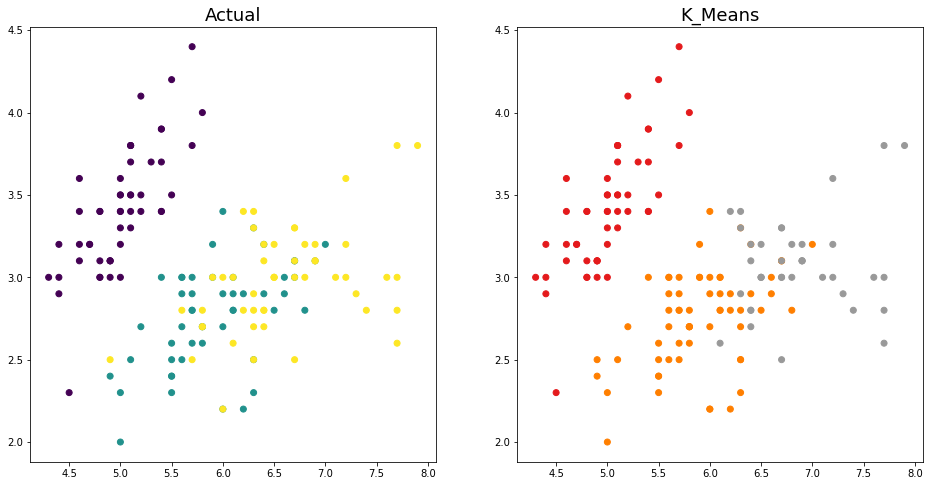

In [ ]:
# Comparison of Actual and K-Means Predicted Labels
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=y_label)
axes[1].scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=y_pred, cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)
plt.savefig('actualvspredicted.png')
plt.show()

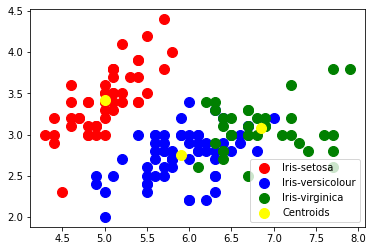

In [ ]:
#Visualising the clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.savefig('clusters.png')
plt.legend()

## Evaluation


In [ ]:
# Evaluation
print('Classification Report\n', classification_report(y_label, y_pred))
accuracy = accuracy_score(y_label, y_pred) * 100
print('K-Means Accuracy:', str(round(accuracy, 2)) + '%')

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

K-Means Accuracy: 89.33%


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_label, y_pred)
cm

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

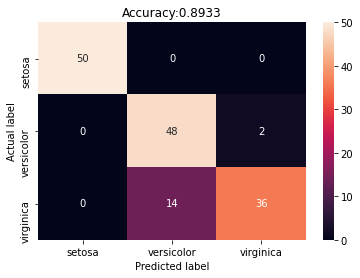

In [ ]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index=['setosa', 'versicolor', 'virginica'],
                     columns=['setosa', 'versicolor', 'virginica'])
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy:{0:.4f}'.format(accuracy_score(y_label, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusionMatrix.png')
plt.show()

## References
1. https://numpy.org/
2. https://pandas.pydata.org/
3. https://matplotlib.org/
4. https://seaborn.pydata.org/
5. https://scikit-learn.org/
6. https://www.scipy.org/